In [3]:
# Libraries
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from scipy import stats
from pandas import Series, DataFrame
from pandas.plotting import autocorrelation_plot
#from pandas.tools.plotting import scatter_matrix
from pylab import rcParams
from matplotlib import collections as collections
from matplotlib.patches import Rectangle
from itertools import cycle

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
from numpy import median
from numpy import mean

In [24]:
df = pd.read_csv('credit-g1.csv')

In [11]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'no checking',24,'existing paid',radio/tv,3430,500<=X<1000,>=7,3,'male single',none,...,car,31,none,own,1,skilled,2,yes,yes,good
1,'no checking',48,'critical/other existing credit',education,6110,<100,1<=X<4,1,'male single',none,...,'no known property',31,bank,'for free',1,skilled,1,yes,yes,good
2,'no checking',12,'existing paid',radio/tv,1262,<100,1<=X<4,3,'male single',none,...,car,25,none,own,1,skilled,1,none,yes,good
3,'no checking',12,'critical/other existing credit',radio/tv,618,<100,>=7,4,'male single',none,...,'real estate',56,none,own,1,skilled,1,none,yes,good
4,'no checking',24,'existing paid','new car',1469,100<=X<500,>=7,4,'male mar/wid',none,...,'real estate',41,none,rent,1,'unskilled resident',1,none,yes,good


In [25]:

print('Cantidad de filas:', len(df))

Cantidad de filas: 51


In [39]:
# Pregunta 1
df.drop_duplicates(subset=None, inplace=True)
# esta funcion no retorna otro dataframe

In [27]:
print ('Cantidad de filas despues de eliminar duplicados', len(df))

Cantidad de filas despues de eliminar duplicados 50


In [29]:
# funcion para recuperar duplicados
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

In [34]:
# Get list of duplicate columns
columnasDuplicadas = getDuplicateColumns(df)
print('columnas duplicadas')
print('Las Columnas duplicadas son:')
for col in columnasDuplicadas:
    print('Columna : ', col)

columnas duplicadas
Las Columnas duplicadas son:


In [36]:
#Pregunta 2
# Eliminar columnas  duplicadas
nuevoDf = df.drop(columns=getDuplicateColumns(df))
print("Dataframe Modificado", nuevoDf, sep='\n')

Dataframe Modificado
   checking_status  duration                    credit_history  \
0    'no checking'        24                   'existing paid'   
1    'no checking'        48  'critical/other existing credit'   
2    'no checking'        12                   'existing paid'   
3    'no checking'        12  'critical/other existing credit'   
4    'no checking'        24                   'existing paid'   
5               <0        12  'critical/other existing credit'   
6    'no checking'        15                   'existing paid'   
7         0<=X<200        11                   'existing paid'   
8               <0        12                   'existing paid'   
9    'no checking'        27              'delayed previously'   
10              <0        30  'critical/other existing credit'   
11   'no checking'        12                   'existing paid'   
12              <0        48             'no credits/all paid'   
13   'no checking'        12  'critical/other existing 

In [43]:
# Pregunta 3
def drop_constant_columns(dataframe):
    result = dataframe.copy()
    for column in dataframe.columns:
        if len(dataframe[column].unique()) == 1:
            result = result.drop(column,axis=1)
    return result


In [44]:
# Eliminar columnas constante
df1 = drop_constant_columns(df)

In [46]:
print('El dataframe nuevo', df1.columns)

El dataframe nuevo Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')


In [49]:
# pregunta 4
# data faltante

total = df.isnull().sum().sort_values(ascending=False)
porcentaje = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
dataFaltante = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Percent'])
dataFaltante.head(20)


,Total,Percent
class,0,0.0
other_parties,0,0.0
duration,0,0.0
credit_history,0,0.0
purpose,0,0.0
credit_amount,0,0.0
savings_status,0,0.0
employment,0,0.0
installment_commitment,0,0.0
personal_status,0,0.0


<AxesSubplot:ylabel='Frequency'>

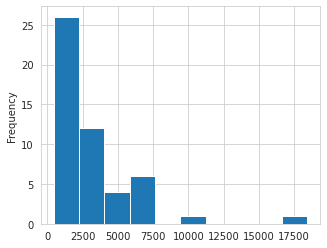

In [58]:
#Pregunta 5 Graficos
df.head()
#cars.index = cars.car_names
credit_amount = df['credit_amount']
credit_amount.plot(kind = 'hist')

<AxesSubplot:xlabel='duration', ylabel='credit_amount'>

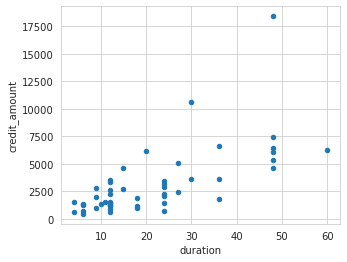

In [61]:
df.head()
df.plot(kind='scatter', x='duration', y='credit_amount')

In [54]:
# Pregunta 6
# Aplicar expresión matemática para el cálculo (CreditAmount / Duración)*residence_since
df['nueva_columna'] = df['credit_amount']/df['duration']*df['residence_since']
df['nueva_columna']
df.nueva_columna

0      285.833333
1      381.875000
2      210.333333
3      206.000000
4      244.833333
5      583.166667
6      541.600000
7      143.363636
8      292.000000
9      758.074074
10    1416.400000
11     235.500000
12     383.750000
13     467.333333
14     420.666667
15     448.416667
16     171.333333
17     213.111111
18     859.333333
19     419.333333
20     191.500000
21     171.500000
22     204.666667
23     201.111111
24     298.666667
25      93.958333
26     907.333333
27     375.750000
28     127.833333
29     622.000000
30     440.000000
31     616.400000
32     155.750000
33     269.400000
34     120.666667
35     262.333333
36    1229.600000
37     401.000000
38     553.500000
39     407.000000
40     119.500000
41     147.666667
42     450.750000
43    1110.333333
44     734.888889
45     361.777778
46     767.666667
47     419.200000
48     487.466667
49     376.500000
Name: nueva_columna, dtype: float64